<a href="https://colab.research.google.com/github/JuanD-Silva/Universidad/blob/main/Aprendizaje%20Supervisado/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


df = pd.read_excel('/content/1.1 - teorema central del límite - distribuciones_cotidianas_peque.xlsx', sheet_name=5)
df.head()

,ingresos_mensuales,horas_sueño_diarias,minutos_redes_sociales_diarios,pasos_diarios
0,1.261475e+10,6.819617,29.950032,7465.348575
1,3.897301e+04,12.962184,38.834965,6925.696731
2,2.410671e+01,7.146131,9.231199,4119.190968
3,2.457543e+04,11.035592,101.557411,8011.243107
4,5.003957e+01,4.792458,86.533336,9775.782512


# **Punto 1**

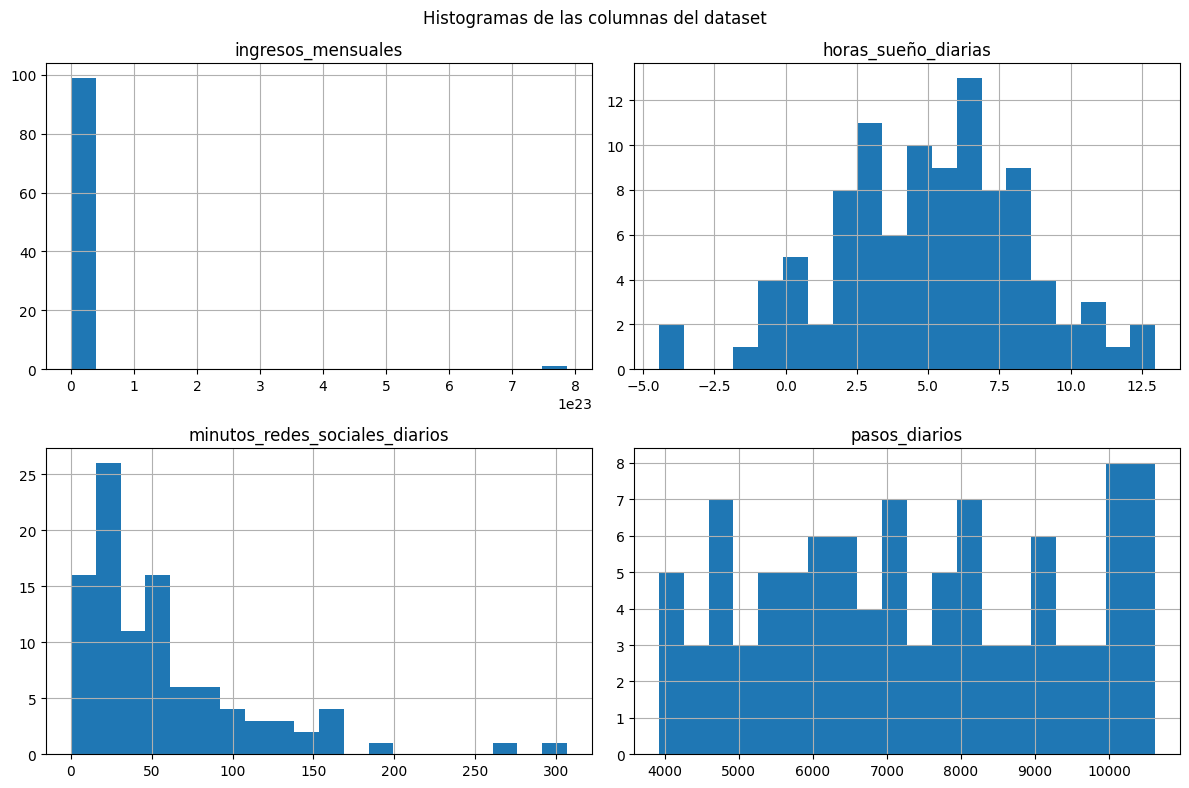

In [ ]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de las columnas del dataset')
plt.tight_layout()
plt.show()

In [ ]:
# Crear una nueva columna con el logaritmo de 'ingresos mensuales'
df['log_ingresos'] = np.log(df['ingresos_mensuales'])



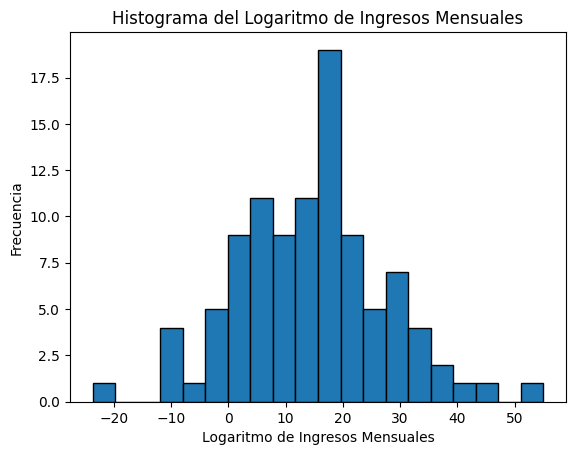

In [ ]:
plt.hist(df['log_ingresos'], bins=20, edgecolor='black')

plt.xlabel('Logaritmo de Ingresos Mensuales')
plt.ylabel('Frecuencia')
plt.title('Histograma del Logaritmo de Ingresos Mensuales')
plt.show()

# Punto 2
Parece una distribución normal la distribución de las horas de sueño, la de ingreso mensual es lognormal, la de minutos de redes sociales es una distribución exponencial y la de pasos diarios es una distribución uniforme

# **Punto 3**

In [ ]:

resumen_numerico = df.describe()
print("Resumen de columnas numéricas:")
print(resumen_numerico)

Resumen de columnas numéricas:
       ingresos_mensuales  horas_sueño_diarias  \
count        1.000000e+02           100.000000   
mean         7.872060e+21             5.005847   
std          7.871201e+22             3.412679   
min          5.167355e-11            -4.439035   
25%          8.490145e+02             2.729669   
50%          3.946961e+06             5.273338   
75%          3.227127e+09             7.180523   
max          7.871210e+23            12.962184   

       minutos_redes_sociales_diarios  pasos_diarios  log_ingresos  
count                      100.000000     100.000000    100.000000  
mean                        57.459217    7370.543384     14.704394  
std                         55.146600    1983.538113     12.906232  
min                          0.071347    3926.025298    -23.686075  
25%                         19.274414    5879.035774      6.707289  
50%                         39.908650    7188.135634     15.162635  
75%                         76.2232

# **Punto 4**


In [ ]:
df2 = pd.read_excel('/content/1.2 - teorema central del límite - distribuciones_cotidianas_grande.xlsx', sheet_name=5)
df2.head()

,ingresos_mensuales,horas_sueño_diarias,minutos_redes_sociales_diarios,pasos_diarios
0,3.491369e+08,8.327646,34.551574,9420.456238
1,8.094202e+09,7.866189,34.849109,10286.438028
2,7.532262e+07,10.549645,34.872714,4272.010345
3,3.761587e+11,5.221482,68.212063,2716.424100
4,6.955289e-04,9.410847,8.766515,6552.528952


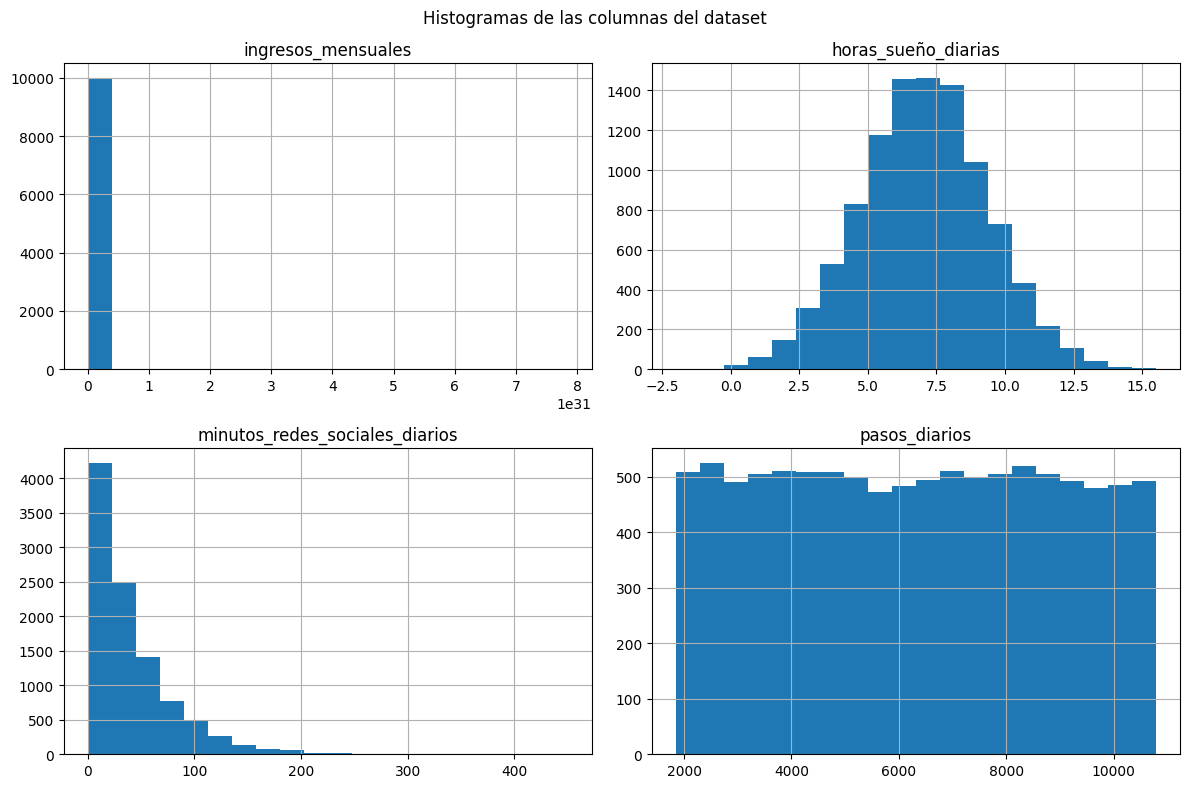

In [ ]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de las columnas del dataset')
plt.tight_layout()
plt.show()

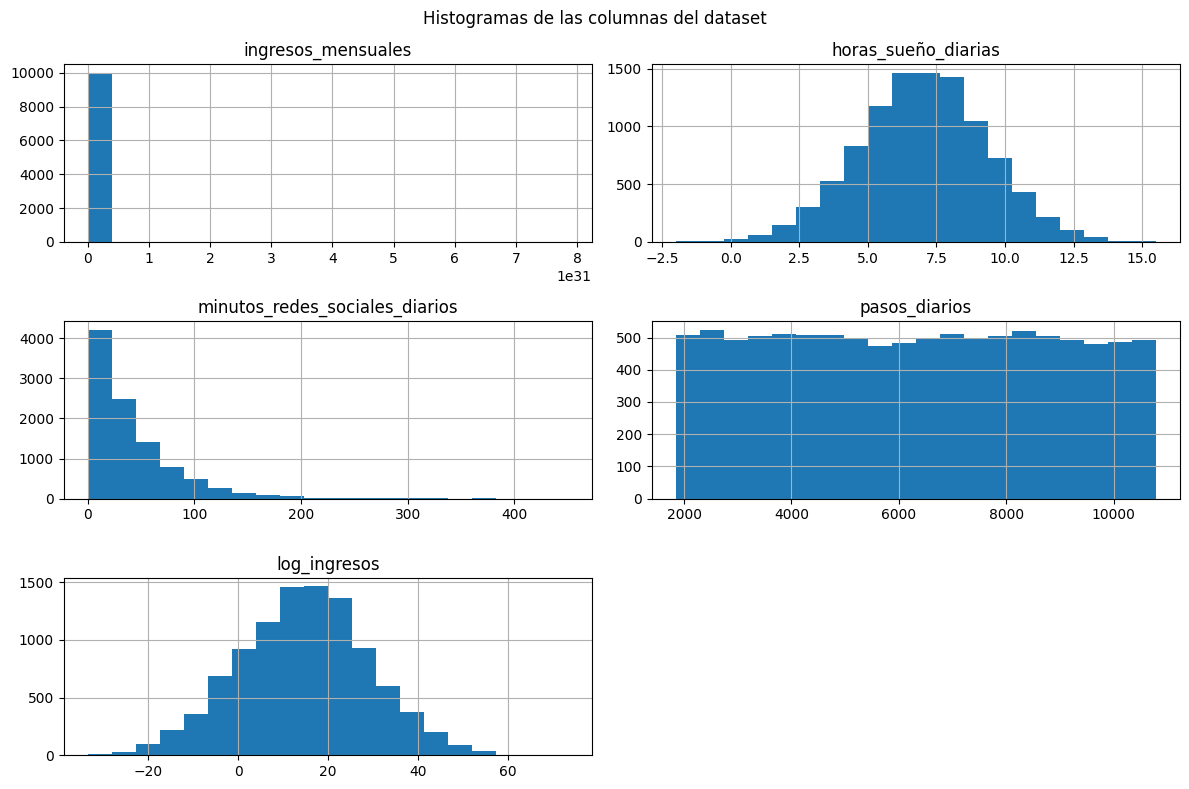

In [ ]:
df2['log_ingresos'] = np.log(df2['ingresos_mensuales'])
df2.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de las columnas del dataset')
plt.tight_layout()
plt.show()

# **Punto 5**

In [ ]:
poblacion_log_ingresos= df2['log_ingresos']

media_poblacional = poblacion_log_ingresos.mean()
varianza_poblacional = poblacion_log_ingresos.var(ddof=0)
mediana_poblacional = poblacion_log_ingresos.median()

print("Parámetros de la población:")
print("Media:", media_poblacional)
print("Varianza:", varianza_poblacional)
print("Mediana:", mediana_poblacional)

Parámetros de la población:
Media: 14.614182237689512
Varianza: 210.96695532789178
Mediana: 14.863332074725182


In [ ]:
n_muestras = 1000
tam_muestra = 10

In [ ]:
medias_muestrales = []
varianzas_muestrales = []
medianas_muestrales = []

In [ ]:
for _ in range(n_muestras):
    # Se extrae una muestra aleatoria con reemplazo
    muestra = poblacion_log_ingresos.sample(n=tam_muestra, replace=True)
    medias_muestrales.append(muestra.mean())
    varianzas_muestrales.append(muestra.var(ddof=1))  # Varianza muestral
    medianas_muestrales.append(muestra.median())

# Convertir a arrays para facilitar el manejo
medias_muestrales = np.array(medias_muestrales)
varianzas_muestrales = np.array(varianzas_muestrales)
medianas_muestrales = np.array(medianas_muestrales)

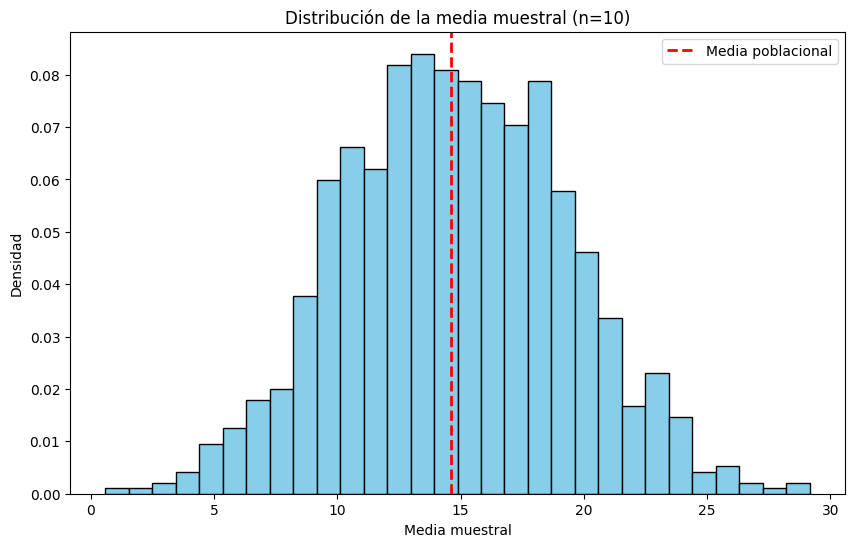

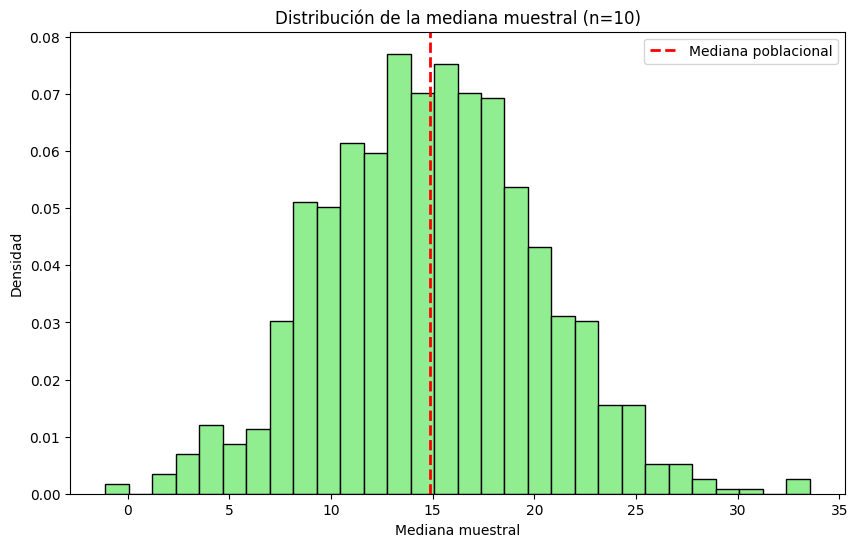

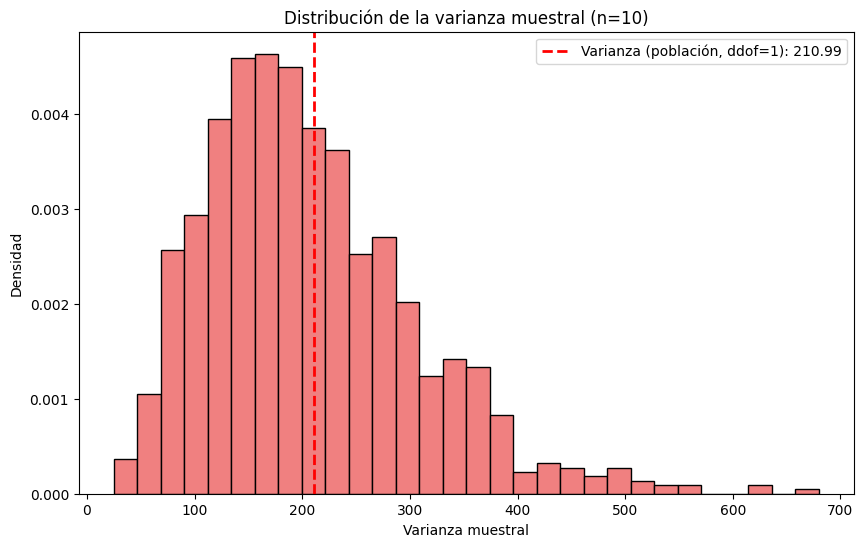

In [ ]:
# Histograma de la media muestral
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales, bins=30, edgecolor='black', density=True, color='skyblue')
plt.axvline(media_poblacional, color='red', linestyle='dashed', linewidth=2, label='Media poblacional')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.title('Distribución de la media muestral (n=10)')
plt.legend()
plt.show()

# Histograma de la mediana muestral
plt.figure(figsize=(10, 6))
plt.hist(medianas_muestrales, bins=30, edgecolor='black', density=True, color='lightgreen')
plt.axvline(mediana_poblacional, color='red', linestyle='dashed', linewidth=2, label='Mediana poblacional')
plt.xlabel('Mediana muestral')
plt.ylabel('Densidad')
plt.title('Distribución de la mediana muestral (n=10)')
plt.legend()
plt.show()

# Histograma de la varianza muestral
plt.figure(figsize=(10, 6))
plt.hist(varianzas_muestrales, bins=30, edgecolor='black', density=True, color='lightcoral')
# Para comparar, mostramos la varianza poblacional muestral (calculada con ddof=1)
varianza_poblacional_muestral = poblacion_log_ingresos.var(ddof=1)
plt.axvline(varianza_poblacional_muestral, color='red', linestyle='dashed', linewidth=2,
            label=f'Varianza (población, ddof=1): {varianza_poblacional_muestral:.2f}')
plt.xlabel('Varianza muestral')
plt.ylabel('Densidad')
plt.title('Distribución de la varianza muestral (n=10)')
plt.legend()
plt.show()


Analizando la columna: horas_sueño_diarias
Parámetros poblacionales:
Media: 7.0166
Varianza: 5.3533
Mediana: 7.0318


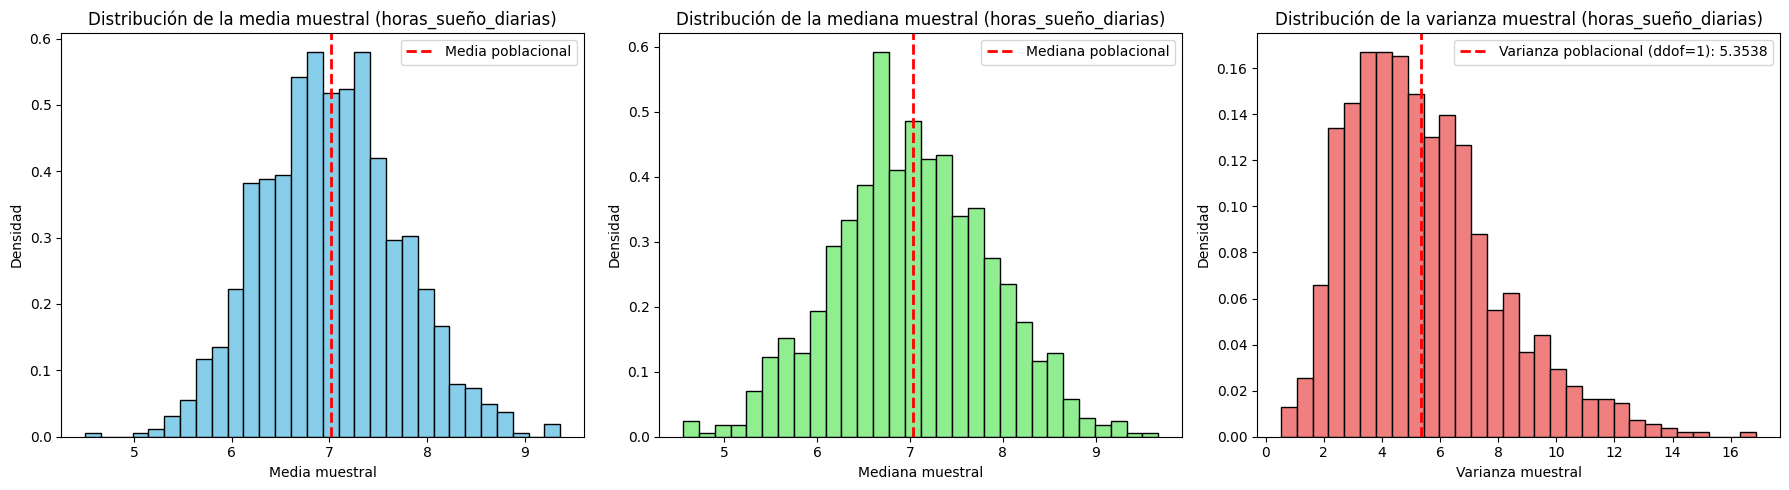


Analizando la columna: minutos_redes_sociales_diarios
Parámetros poblacionales:
Media: 40.5617
Varianza: 1648.7672
Mediana: 28.0136


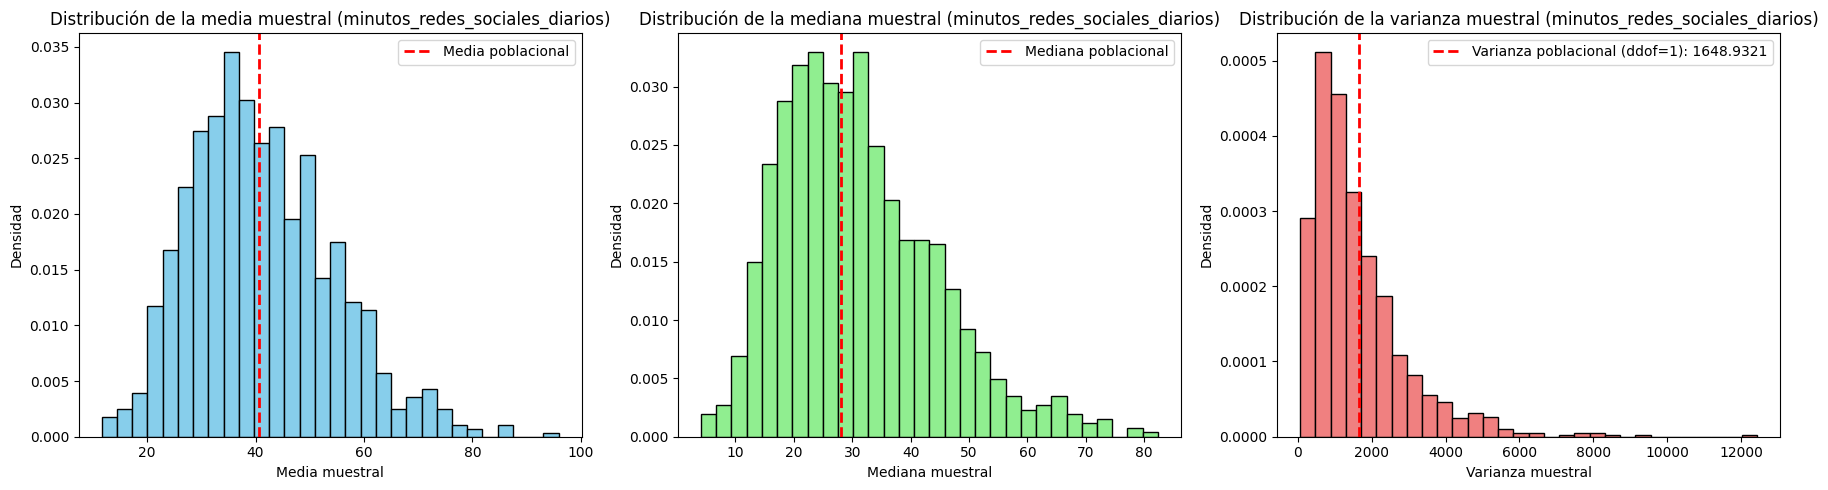


Analizando la columna: pasos_diarios
Parámetros poblacionales:
Media: 6292.0365
Varianza: 6666718.6068
Mediana: 6309.4075


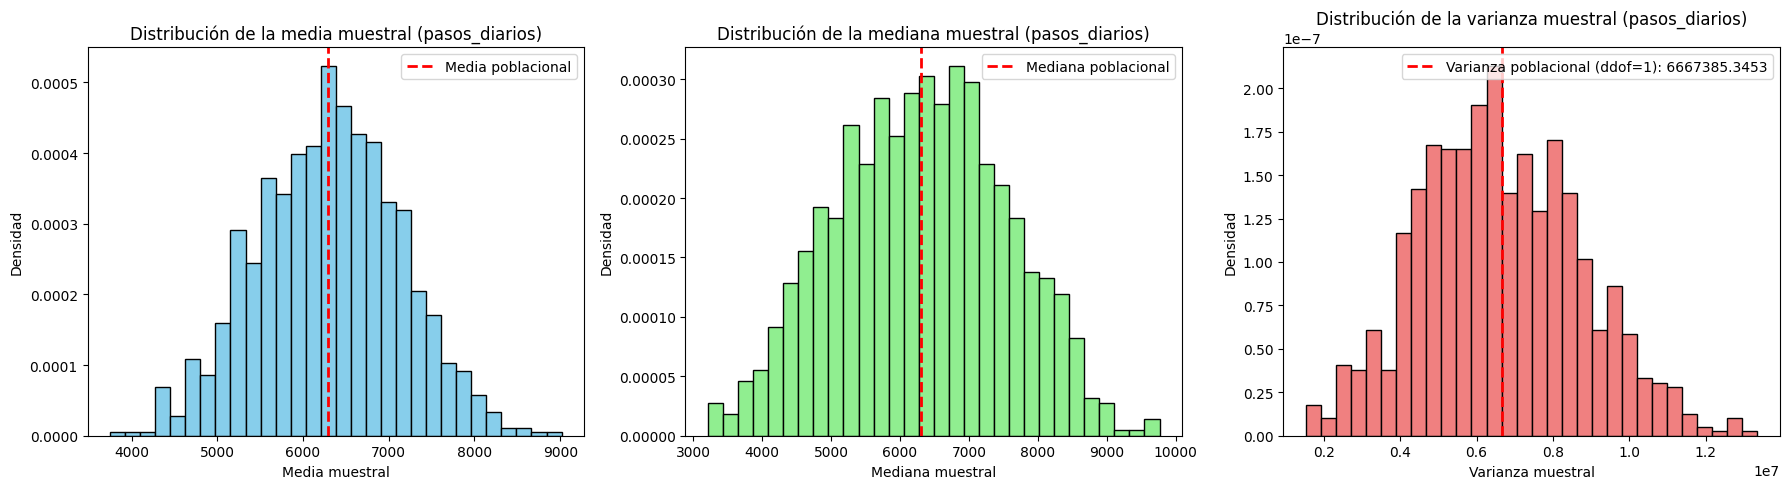

In [ ]:
# Seleccionamos las columnas numéricas, excluyendo 'ingresos_mensuales'
columnas = [col for col in df.columns
            if col != 'ingresos_mensuales' and pd.api.types.is_numeric_dtype(df[col])]

n_muestras = 1000  # Número de muestras a extraer
tam_muestra = 10   # Tamaño de cada muestra

for col in columnas:
    print(f"\nAnalizando la columna: {col}")

    # Definimos la "población" como la columna actual
    poblacion = df[col]

    # Cálculo de parámetros poblacionales
    media_pob = poblacion.mean()
    varianza_pob = poblacion.var(ddof=0)  # Varianza poblacional (ddof=0)
    mediana_pob = poblacion.median()

    print("Parámetros poblacionales:")
    print(f"Media: {media_pob:.4f}")
    print(f"Varianza: {varianza_pob:.4f}")
    print(f"Mediana: {mediana_pob:.4f}")

    # Listas para almacenar los estimadores muestrales
    medias_muestrales = []
    varianzas_muestrales = []
    medianas_muestrales = []

    # Simulación de muestreo repetido
    for _ in range(n_muestras):
        muestra = poblacion.sample(n=tam_muestra, replace=True)
        medias_muestrales.append(muestra.mean())
        varianzas_muestrales.append(muestra.var(ddof=1))  # Varianza muestral (ddof=1)
        medianas_muestrales.append(muestra.median())

    # Convertir las listas a arrays para facilitar el manejo
    medias_muestrales = np.array(medias_muestrales)
    varianzas_muestrales = np.array(varianzas_muestrales)
    medianas_muestrales = np.array(medianas_muestrales)

    # Gráficos: se crean 3 subplots para cada estimador
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histograma de la media muestral
    axes[0].hist(medias_muestrales, bins=30, edgecolor='black', density=True, color='skyblue')
    axes[0].axvline(media_pob, color='red', linestyle='dashed', linewidth=2, label='Media poblacional')
    axes[0].set_title(f'Distribución de la media muestral ({col})')
    axes[0].set_xlabel('Media muestral')
    axes[0].set_ylabel('Densidad')
    axes[0].legend()

    # Histograma de la mediana muestral
    axes[1].hist(medianas_muestrales, bins=30, edgecolor='black', density=True, color='lightgreen')
    axes[1].axvline(mediana_pob, color='red', linestyle='dashed', linewidth=2, label='Mediana poblacional')
    axes[1].set_title(f'Distribución de la mediana muestral ({col})')
    axes[1].set_xlabel('Mediana muestral')
    axes[1].set_ylabel('Densidad')
    axes[1].legend()

    # Histograma de la varianza muestral
    axes[2].hist(varianzas_muestrales, bins=30, edgecolor='black', density=True, color='lightcoral')
    # Para comparar, usamos la varianza poblacional calculada con ddof=1
    varianza_pob_muestral = poblacion.var(ddof=1)
    axes[2].axvline(varianza_pob_muestral, color='red', linestyle='dashed', linewidth=2,
                    label=f'Varianza poblacional (ddof=1): {varianza_pob_muestral:.4f}')
    axes[2].set_title(f'Distribución de la varianza muestral ({col})')
    axes[2].set_xlabel('Varianza muestral')
    axes[2].set_ylabel('Densidad')
    axes[2].legend()

    plt.tight_layout()
    plt.show()


# **Punto 6**

In [ ]:
n_muestras = 200
tam_muestra = 500

In [ ]:
medias_muestrales = []
varianzas_muestrales = []
medianas_muestrales = []

In [ ]:
for _ in range(n_muestras):
    # Se extrae una muestra aleatoria con reemplazo
    muestra = poblacion_log_ingresos.sample(n=tam_muestra, replace=True)
    medias_muestrales.append(muestra.mean())
    varianzas_muestrales.append(muestra.var(ddof=1))  # Varianza muestral
    medianas_muestrales.append(muestra.median())

# Convertir a arrays para facilitar el manejo
medias_muestrales = np.array(medias_muestrales)
varianzas_muestrales = np.array(varianzas_muestrales)
medianas_muestrales = np.array(medianas_muestrales)

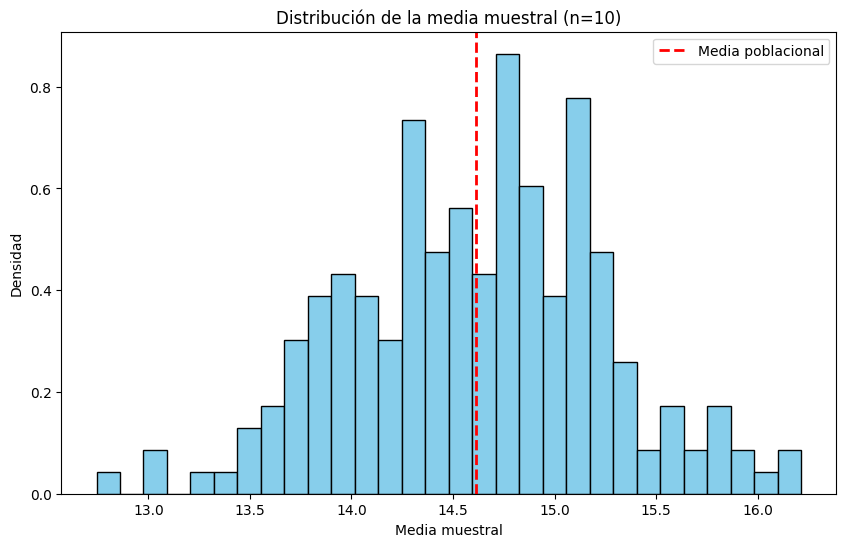

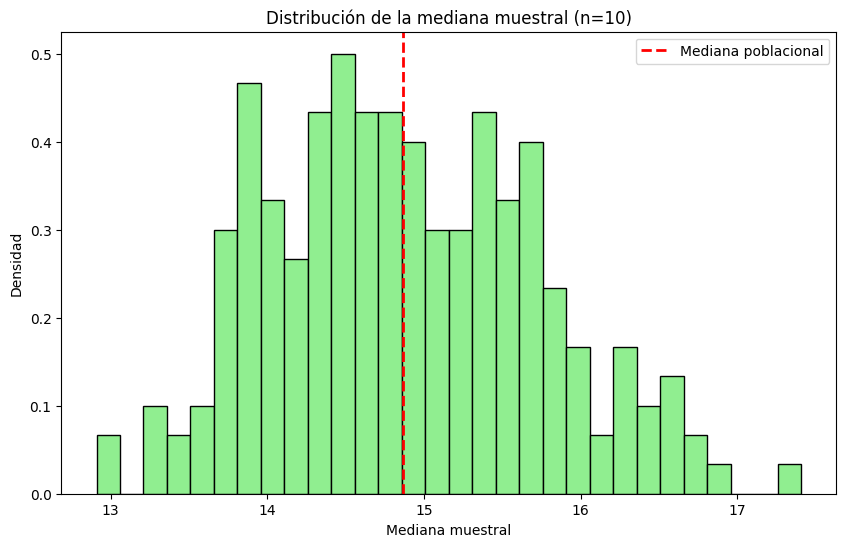

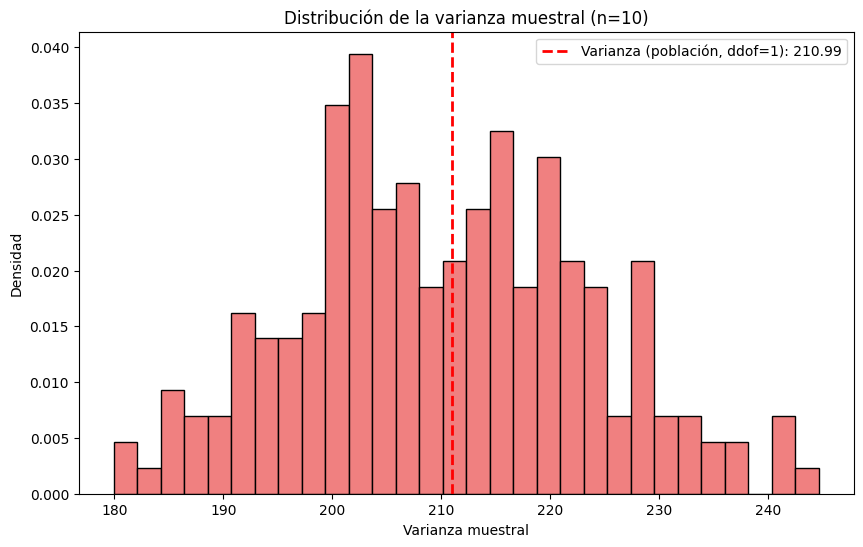

In [ ]:
# Histograma de la media muestral
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales, bins=30, edgecolor='black', density=True, color='skyblue')
plt.axvline(media_poblacional, color='red', linestyle='dashed', linewidth=2, label='Media poblacional')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.title('Distribución de la media muestral (n=10)')
plt.legend()
plt.show()

# Histograma de la mediana muestral
plt.figure(figsize=(10, 6))
plt.hist(medianas_muestrales, bins=30, edgecolor='black', density=True, color='lightgreen')
plt.axvline(mediana_poblacional, color='red', linestyle='dashed', linewidth=2, label='Mediana poblacional')
plt.xlabel('Mediana muestral')
plt.ylabel('Densidad')
plt.title('Distribución de la mediana muestral (n=10)')
plt.legend()
plt.show()

# Histograma de la varianza muestral
plt.figure(figsize=(10, 6))
plt.hist(varianzas_muestrales, bins=30, edgecolor='black', density=True, color='lightcoral')
# Para comparar, mostramos la varianza poblacional muestral (calculada con ddof=1)
varianza_poblacional_muestral = poblacion_log_ingresos.var(ddof=1)
plt.axvline(varianza_poblacional_muestral, color='red', linestyle='dashed', linewidth=2,
            label=f'Varianza (población, ddof=1): {varianza_poblacional_muestral:.2f}')
plt.xlabel('Varianza muestral')
plt.ylabel('Densidad')
plt.title('Distribución de la varianza muestral (n=10)')
plt.legend()
plt.show()


Analizando la columna: horas_sueño_diarias
Parámetros poblacionales:
Media: 7.0166
Varianza: 5.3533
Mediana: 7.0318


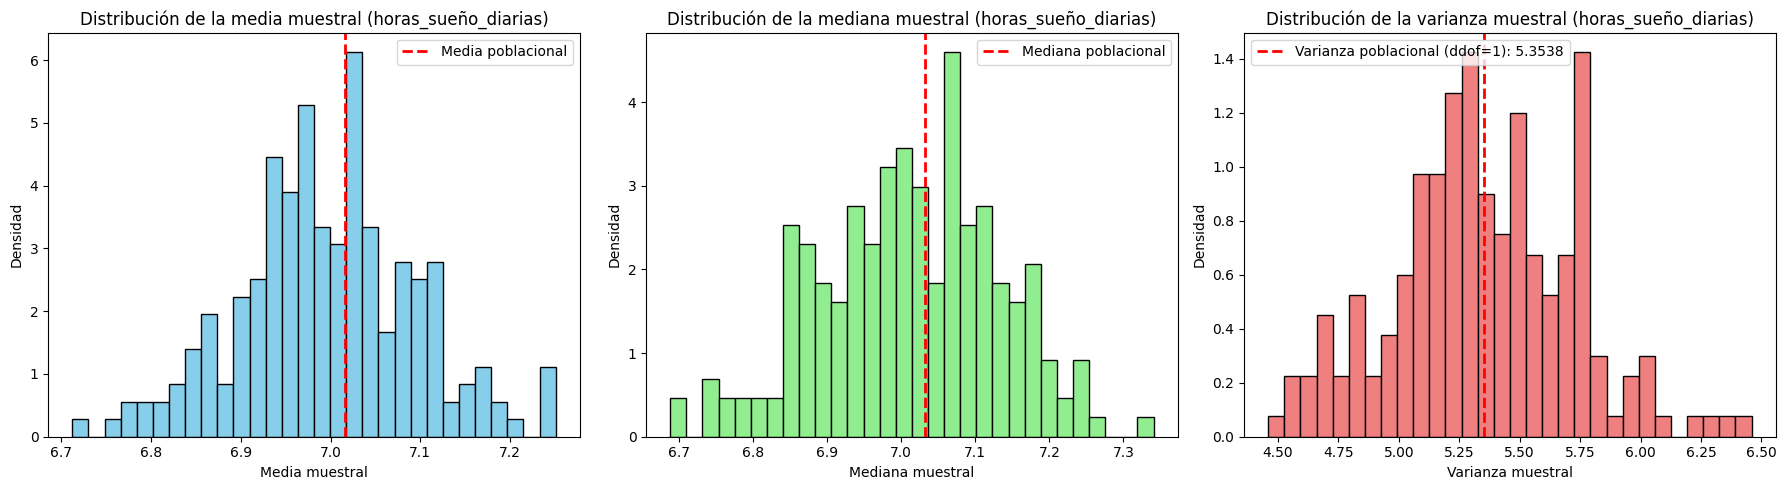


Analizando la columna: minutos_redes_sociales_diarios
Parámetros poblacionales:
Media: 40.5617
Varianza: 1648.7672
Mediana: 28.0136


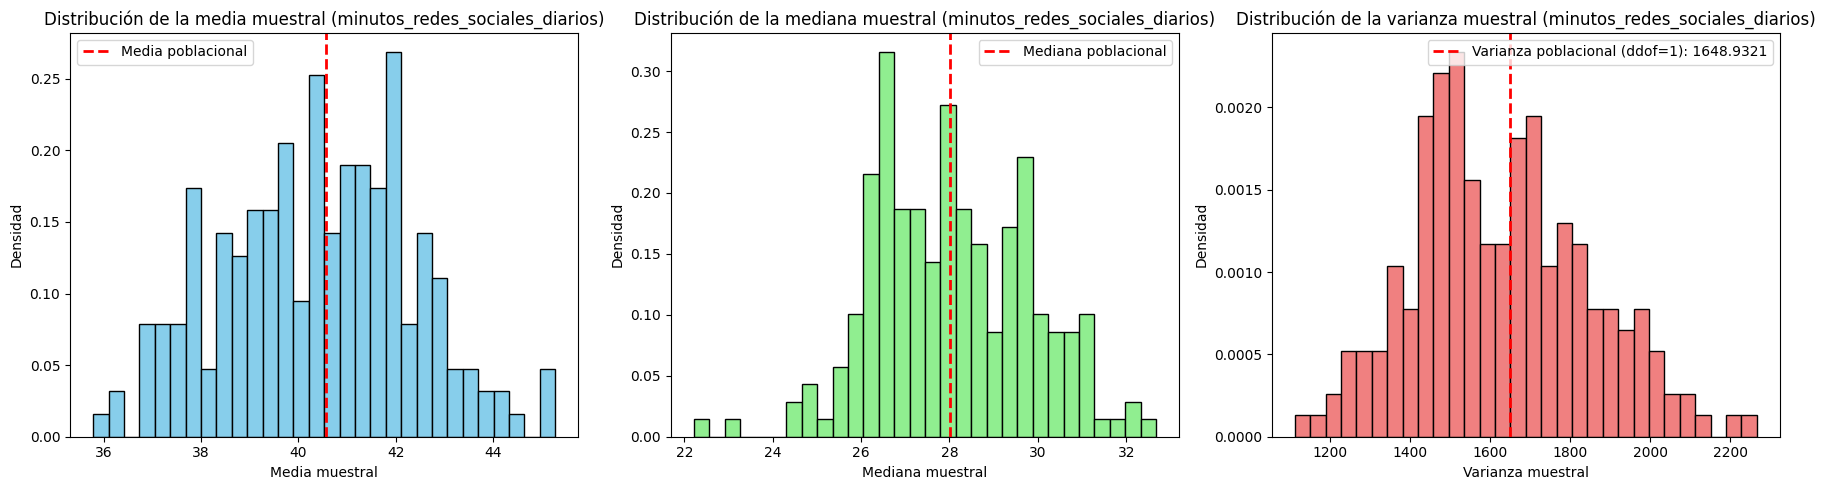


Analizando la columna: pasos_diarios
Parámetros poblacionales:
Media: 6292.0365
Varianza: 6666718.6068
Mediana: 6309.4075


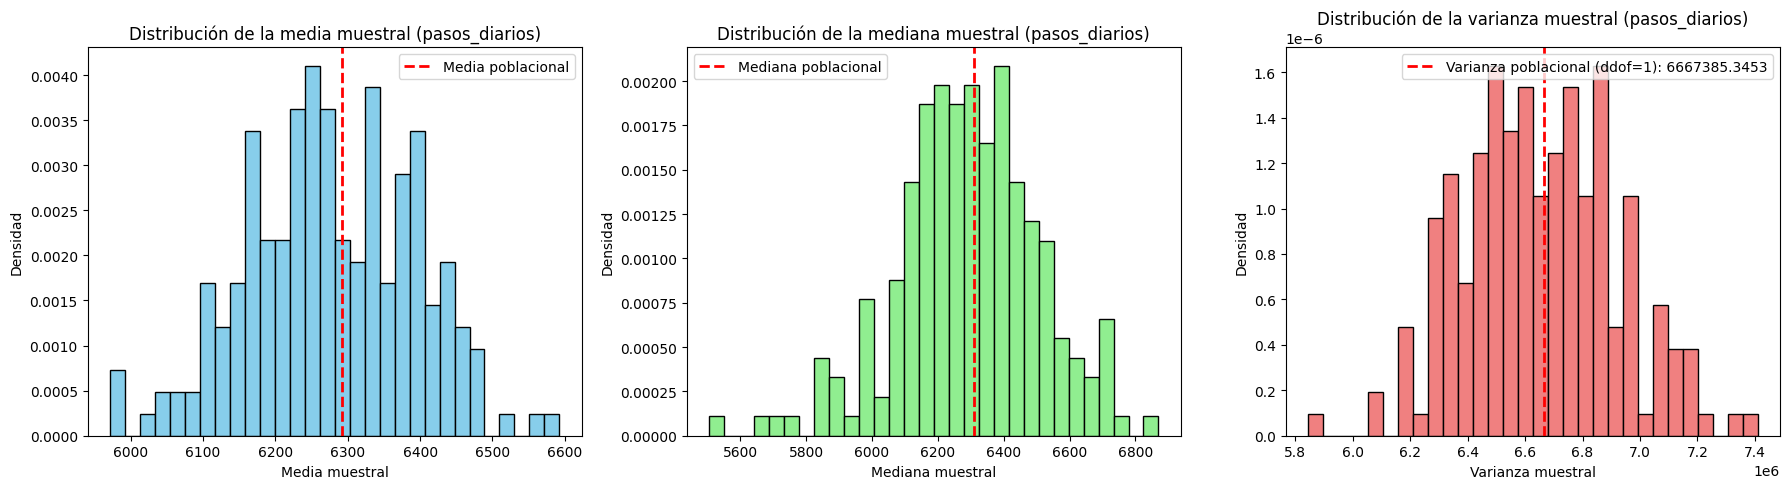

In [ ]:
# Seleccionamos las columnas numéricas, excluyendo 'ingresos_mensuales'
columnas = [col for col in df.columns
            if col != 'ingresos_mensuales' and pd.api.types.is_numeric_dtype(df[col])]


for col in columnas:
    print(f"\nAnalizando la columna: {col}")

    # Definimos la "población" como la columna actual
    poblacion = df[col]

    # Cálculo de parámetros poblacionales
    media_pob = poblacion.mean()
    varianza_pob = poblacion.var(ddof=0)  # Varianza poblacional (ddof=0)
    mediana_pob = poblacion.median()

    print("Parámetros poblacionales:")
    print(f"Media: {media_pob:.4f}")
    print(f"Varianza: {varianza_pob:.4f}")
    print(f"Mediana: {mediana_pob:.4f}")

    # Listas para almacenar los estimadores muestrales
    medias_muestrales = []
    varianzas_muestrales = []
    medianas_muestrales = []

    # Simulación de muestreo repetido
    for _ in range(n_muestras):
        muestra = poblacion.sample(n=tam_muestra, replace=True)
        medias_muestrales.append(muestra.mean())
        varianzas_muestrales.append(muestra.var(ddof=1))  # Varianza muestral (ddof=1)
        medianas_muestrales.append(muestra.median())

    # Convertir las listas a arrays para facilitar el manejo
    medias_muestrales = np.array(medias_muestrales)
    varianzas_muestrales = np.array(varianzas_muestrales)
    medianas_muestrales = np.array(medianas_muestrales)

    # Gráficos: se crean 3 subplots para cada estimador
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histograma de la media muestral
    axes[0].hist(medias_muestrales, bins=30, edgecolor='black', density=True, color='skyblue')
    axes[0].axvline(media_pob, color='red', linestyle='dashed', linewidth=2, label='Media poblacional')
    axes[0].set_title(f'Distribución de la media muestral ({col})')
    axes[0].set_xlabel('Media muestral')
    axes[0].set_ylabel('Densidad')
    axes[0].legend()

    # Histograma de la mediana muestral
    axes[1].hist(medianas_muestrales, bins=30, edgecolor='black', density=True, color='lightgreen')
    axes[1].axvline(mediana_pob, color='red', linestyle='dashed', linewidth=2, label='Mediana poblacional')
    axes[1].set_title(f'Distribución de la mediana muestral ({col})')
    axes[1].set_xlabel('Mediana muestral')
    axes[1].set_ylabel('Densidad')
    axes[1].legend()

    # Histograma de la varianza muestral
    axes[2].hist(varianzas_muestrales, bins=30, edgecolor='black', density=True, color='lightcoral')
    # Para comparar, usamos la varianza poblacional calculada con ddof=1
    varianza_pob_muestral = poblacion.var(ddof=1)
    axes[2].axvline(varianza_pob_muestral, color='red', linestyle='dashed', linewidth=2,
                    label=f'Varianza poblacional (ddof=1): {varianza_pob_muestral:.4f}')
    axes[2].set_title(f'Distribución de la varianza muestral ({col})')
    axes[2].set_xlabel('Varianza muestral')
    axes[2].set_ylabel('Densidad')
    axes[2].legend()

    plt.tight_layout()
    plt.show()


# **Punto 7**

In [ ]:
# Seleccionar las columnas numéricas, excluyendo 'ingresos_mensuales'
columnas = [col for col in df.columns
            if col != 'ingresos_mensuales' and pd.api.types.is_numeric_dtype(df[col])]

# Listas para almacenar los parámetros
medias = []
varianzas = []
medianas = []

# Calcular los parámetros para cada columna
for col in columnas:
    medias.append(df[col].mean())
    varianzas.append(df[col].var(ddof=0))  # Varianza poblacional (ddof=0)
    medianas.append(df[col].median())

# Mostrar en consola los parámetros para cada columna
for i, col in enumerate(columnas):
    print(f"\nColumna: {col}")
    print(f"Media: {medias[i]:.4f}")
    print(f"Varianza: {varianzas[i]:.4f}")
    print(f"Mediana: {medianas[i]:.4f}")






Columna: horas_sueño_diarias
Media: 7.0166
Varianza: 5.3533
Mediana: 7.0318

Columna: minutos_redes_sociales_diarios
Media: 40.5617
Varianza: 1648.7672
Mediana: 28.0136

Columna: pasos_diarios
Media: 6292.0365
Varianza: 6666718.6068
Mediana: 6309.4075
